In [135]:
import pandas as pd
import numpy as np


import sklearn
from sklearn.datasets import load_iris, load_breast_cancer


from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_validate, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.impute import SimpleImputer


import seaborn as sns


In [2]:
### 학습목표(데이터 전처리)
# 결측치 처리(missingno), 이상치 처리(박스플롯)
# 데이터 인코딩(ml 문자열의 값을 입력값으로 허용하지 않는다) > 숫자형 변환
# 인코딩 방법(레이블 인코딩, 원 핫 인코딩)
# 데이터 인코딩 회귀 사용할 수 없다, 트리계열의 알고리즘에 적용할 경우 최적화 된다
# 트리계열의 알고리즘 주엥서 성능이 떨ㄹ어진다는 단점이 있을 수 있다. - 숫자의 특성이 반영되기 때문에

# feature scaling -> 정규화, 표준화
# 정규화 (0~1 사이의 값으로 변환 - MinMaxScalar)
# 표준화 (정규분포를 따르는 형식으로 평균이 0 이고 분산이 1 가우시안 분포 변환 -> SandardScaler)

# feature important 피처의 중요도

In [6]:
iris = load_iris()
print('type -', type(iris))
print('keys -', iris.keys(), type(iris.keys()))

type - <class 'sklearn.utils.Bunch'>
keys - dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) <class 'dict_keys'>


In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=200)



In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [17]:
print('불순도(impurity) - 해당 범주안에 서로 다른 데이ㅓ가 얼마나 섞여있는지 - ')
print('엔트로피(entropy) - 불순도를 수치적으로 나태낸 척도')
print('지니(gini) - 불순도를 수치적으로 나태낸 척도')

gscv_dtc_model = DecisionTreeClassifier()
param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1,2,3], 
    'min_samples_split' : [2,3],
    'splitter' : ['random', 'best']
}



불순도(impurity) - 해당 범주안에 서로 다른 데이ㅓ가 얼마나 섞여있는지 - 
엔트로피(entropy) - 불순도를 수치적으로 나태낸 척도
지니(gini) - 불순도를 수치적으로 나태낸 척도


In [18]:
print('GridSearchCV를 이용한 최적의 모델을 만드는 방법 -')
grid_tree = GridSearchCV(gscv_dtc_model,
                         param_grid=param,
                         cv = 5,
                         refit=True, # 재학습 옵션
                         
                        )

GridSearchCV를 이용한 최적의 모델을 만드는 방법 -


In [20]:
grid_tree.fit(X_train, y_train) # 학습 시킴
grid_tree.cv_results_



{'mean_fit_time': array([0.00120463, 0.00080223, 0.00036945, 0.0003396 , 0.00040207,
        0.00040722, 0.00042119, 0.00051126, 0.00042601, 0.00044522,
        0.00061998, 0.00045877, 0.00045815, 0.00053501, 0.00045485,
        0.00043349, 0.00035877, 0.00041575, 0.00035701, 0.00039082,
        0.00035753, 0.00043607, 0.000354  , 0.00042348]),
 'std_fit_time': array([3.49901879e-04, 4.32324414e-04, 3.74627137e-05, 6.76470442e-06,
        7.83759296e-05, 2.11228635e-05, 4.96276390e-05, 9.30085026e-05,
        6.11556250e-05, 3.63419368e-05, 1.67264770e-04, 5.67963700e-05,
        8.82739565e-05, 1.32269505e-04, 7.96208688e-05, 8.07635186e-05,
        4.84500343e-06, 3.79379027e-05, 6.30904395e-06, 1.37706080e-06,
        3.26067371e-06, 4.00994251e-05, 3.10274095e-06, 1.70033739e-05]),
 'mean_score_time': array([0.00070658, 0.00044832, 0.00021062, 0.00019403, 0.00024538,
        0.00021763, 0.00023651, 0.00026989, 0.00027852, 0.00023198,
        0.00026569, 0.00024142, 0.00023918, 0.00

In [21]:
score_frm = pd.DataFrame(grid_tree.cv_results_)
score_frm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001205,0.000350,0.000707,0.000319,gini,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.500000,0.666667,0.666667,0.666667,0.625000,0.625000,0.064550,24
1,0.000802,0.000432,0.000448,0.000263,gini,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,0.666667,0.666667,0.625000,0.658333,0.016667,17
2,0.000369,0.000037,0.000211,0.000014,gini,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.541667,0.666667,0.666667,0.583333,0.625000,0.052705,22
3,0.000340,0.000007,0.000194,0.000003,gini,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,0.666667,0.666667,0.625000,0.658333,0.016667,17
4,0.000402,0.000078,0.000245,0.000064,gini,2,2,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.750000,0.708333,0.833333,0.708333,0.833333,0.766667,0.056519,16
5,0.000407,0.000021,0.000218,0.000011,gini,2,2,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,2
6,0.000421,0.000050,0.000237,0.000012,gini,2,3,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.791667,0.833333,0.791667,0.708333,0.808333,0.067700,14
7,0.000511,0.000093,0.000270,0.000035,gini,2,3,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,2
8,0.000426,0.000061,0.000279,0.000103,gini,3,2,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.875000,0.833333,0.958333,0.958333,0.875000,0.900000,0.050000,11
9,0.000445,0.000036,0.000232,0.000014,gini,3,2,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.875000,0.908333,0.071686,7


In [32]:
score_frm[['params', 'rank_test_score']]

,params,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",24
1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",17
2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",22
3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",17
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",16
5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",2
6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",14
7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",2
8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",11
9,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",7


In [36]:
print('최적의 파라미터 확인 - ')
print(grid_tree.best_params_)
print()
print('최적의 파라미터의 정확도 - ')
print(grid_tree.best_score_)

최적의 파라미터 확인 - 
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'}

최적의 파라미터의 정확도 - 
0.9416666666666667


In [39]:
estimator = grid_tree.best_estimator_
y_pred = estimator.predict(X_test)
print('answer - \n', y_test)
print()
print('guess - \n', y_pred)
print()
print('acc - \n ',  accuracy_score(y_test, y_pred))

answer - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

guess - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

acc - 
  1.0


In [56]:
gscv_dtc_best_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, splitter='random', random_state=100)
gscv_dtc_best_model.fit(X_train, y_train)
y_pred = gscv_dtc_best_model.predict(X_test)
print('answer - \n', y_test)
print()
print('guess - \n', y_pred)
print()
print('acc - \n ',  accuracy_score(y_test, y_pred))

answer - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

guess - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 1 0 0 0 1 2 1 1]

acc - 
  0.9333333333333333


In [64]:
print('feature importance - ')
print(estimator.feature_importances_)

feature importance - 
[0.         0.         0.69433206 0.30566794]


In [71]:
for name, value in zip(iris.feature_names, estimator.feature_importances_):
    print(name, '\t', value)

sepal length (cm) 	 0.0
sepal width (cm) 	 0.0
petal length (cm) 	 0.6943320570338347
petal width (cm) 	 0.30566794296616534


<AxesSubplot:>

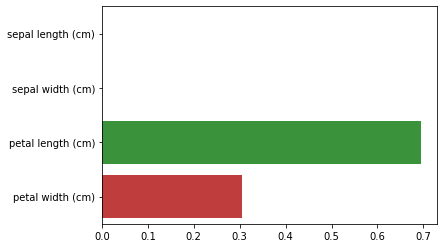

In [74]:
sns.barplot(x=estimator.feature_importances_, y=iris.feature_names)

In [92]:
# breast_cancer 데이터를 이용한 
cancer = load_breast_cancer()
print('type -', type(cancer))
print('keys -', cancer.keys(), type(cancer.keys()))

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=200)


type - <class 'sklearn.utils.Bunch'>
keys - dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) <class 'dict_keys'>


In [93]:
cancer.feature_names
cancer.data
cancer.target_names
cancer.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [90]:
cancer_frm = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_frm['target'] = cancer.target
cancer_frm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [91]:
print('GridSearchCV - DecisionTreeClassifier')
gscv_dtc_model2 = DecisionTreeClassifier()
param2 = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,4,5], 
    'min_samples_split' : [2,3],
    'splitter' : ['random', 'best']
}
grid_tree2 = GridSearchCV(gscv_dtc_model,
                         param_grid=param,
                         cv = 5,
                         refit=True, # 재학습 옵션
                        )


print('학습, 테스트 : 7 : 3 - ')

print('best estimator - ')


print('학습, 예측 - ')


print('피처 즁요도를 시각화 - ')



GridSearchCV - DecisionTreeClassifier
학습, 테스트 : 7 : 3 - 
best estimator - 
학습, 예측 - 
피처 즁요도를 시각화 - 


In [103]:
# 레이블 인코딩

label_items = ['집밥', '제육볶음', 'ABC 쥬스', '샐러드', '낫또', '샐러드', '계란']
encoder = LabelEncoder()
labels = encoder.fit(label_items).transform(label_items)
print('labels - ', labels)
print('encoding class - ', encoder.classes_)
print('decoing - ', encoder.inverse_transform(labels))

labels -  [5 4 0 3 2 3 1]
encoding class -  ['ABC 쥬스' '계란' '낫또' '샐러드' '제육볶음' '집밥']
decoing -  ['집밥' '제육볶음' 'ABC 쥬스' '샐러드' '낫또' '샐러드' '계란']


In [113]:
### 원 핫 인코딩
label_items = ['집밥', '제육볶음', 'ABC 쥬스', '샐러드', '낫또', '샐러드', '계란']
encoder = LabelEncoder()
digit_labels = encoder.fit(label_items).fit_transform(label_items)
print('type - ', type(digit_labels))
print('data - ', digit_labels, digit_labels.shape)
print()

print('차원변환 - reshape - ')
digit_labels = digit_labels.reshape(-1,1)
print('shape - ', digit_labels.shape)
print('data - \n', digit_labels)
print()

print('One-Hot Encoding - ')
one_hot_encoder = fit_transform()
one_hot_encoder_frm =  one_hot_encoder.fit_transform(digit_labels)
print('shape - ', one_hot_encoder_frm.shape)
print('data - \n', one_hot_encoder_frm.toarray())


type -  <class 'numpy.ndarray'>
data -  [5 4 0 3 2 3 1] (7,)

차원변환 - reshape - 
shape -  (7, 1)
data - 
 [[5]
 [4]
 [0]
 [3]
 [2]
 [3]
 [1]]

One-Hot Encoding - 
shape -  (7, 6)
data - 
 [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [115]:
encoder_frm = pd.DataFrame({
    'labels_items' : ['집밥', '제육볶음', 'ABC 쥬스', '샐러드', '낫또', '샐러드', '계란'] 
})
encoder_frm

pd.get_dummies(encoder_frm)

,labels_items_ABC 쥬스,labels_items_계란,labels_items_낫또,labels_items_샐러드,labels_items_제육볶음,labels_items_집밥
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
5,0,0,0,1,0,0
6,0,1,0,0,0,0


In [188]:
### 결측값 처리
# 결측값을 시각화 시켜주는 패키지 인스톨이 필요
# conda install -c conda-forge/label/cf202003 missingno

from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

tmp_frm = pd.read_csv(csv_data)
type(tmp_frm)

pandas.core.frame.DataFrame

In [120]:
tmp_frm.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [136]:
import missingno as msno

<AxesSubplot:>

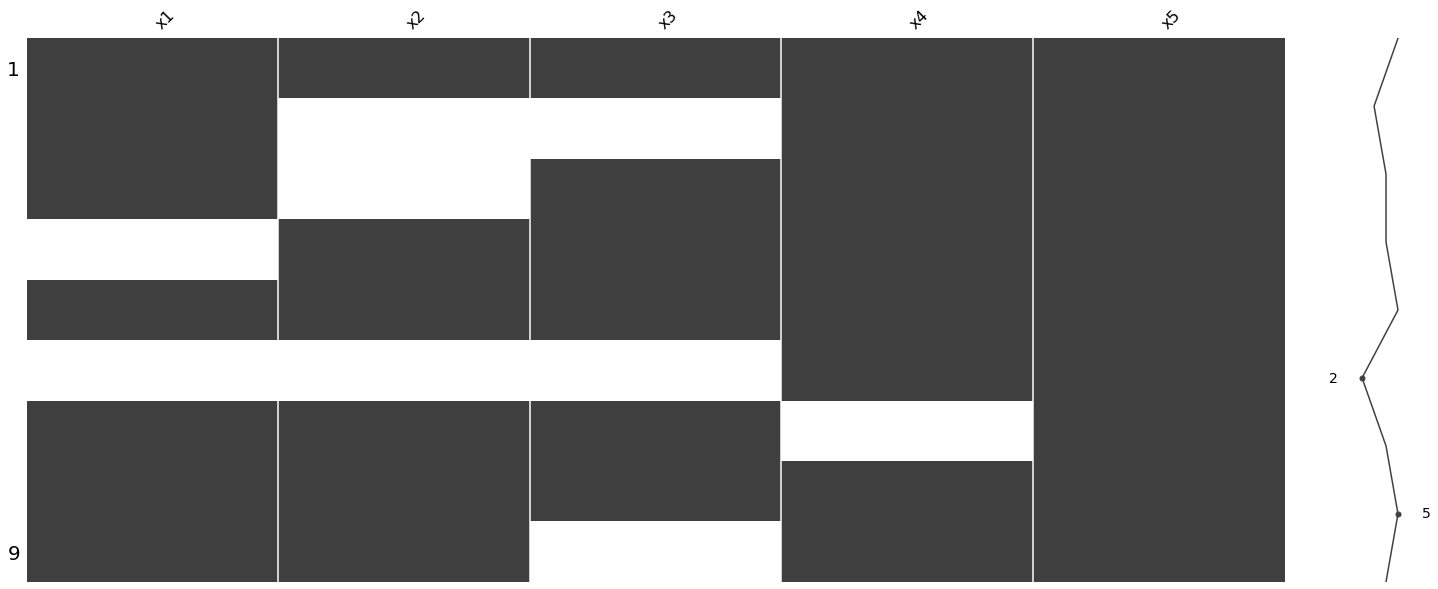

In [124]:
msno.matrix(tmp_frm)

<AxesSubplot:>

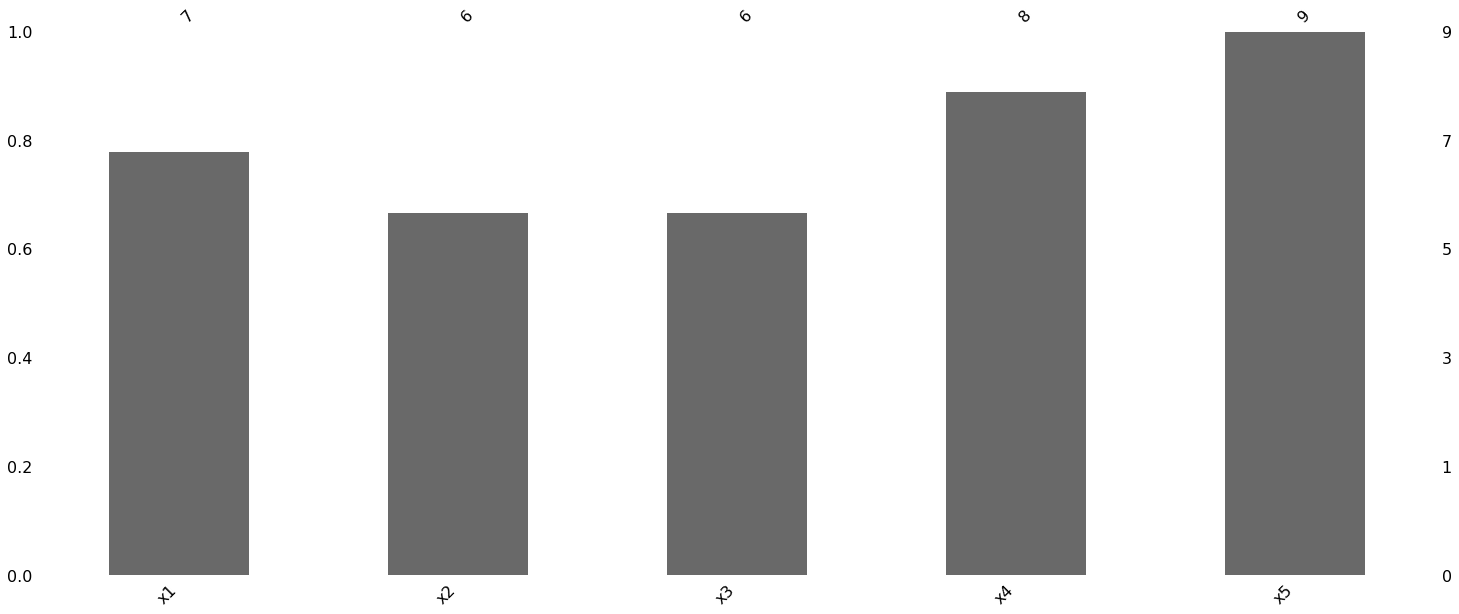

In [126]:
msno.bar(tmp_frm)

In [127]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [129]:
titanic['deck']
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [131]:
titanic.describe()
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<AxesSubplot:>

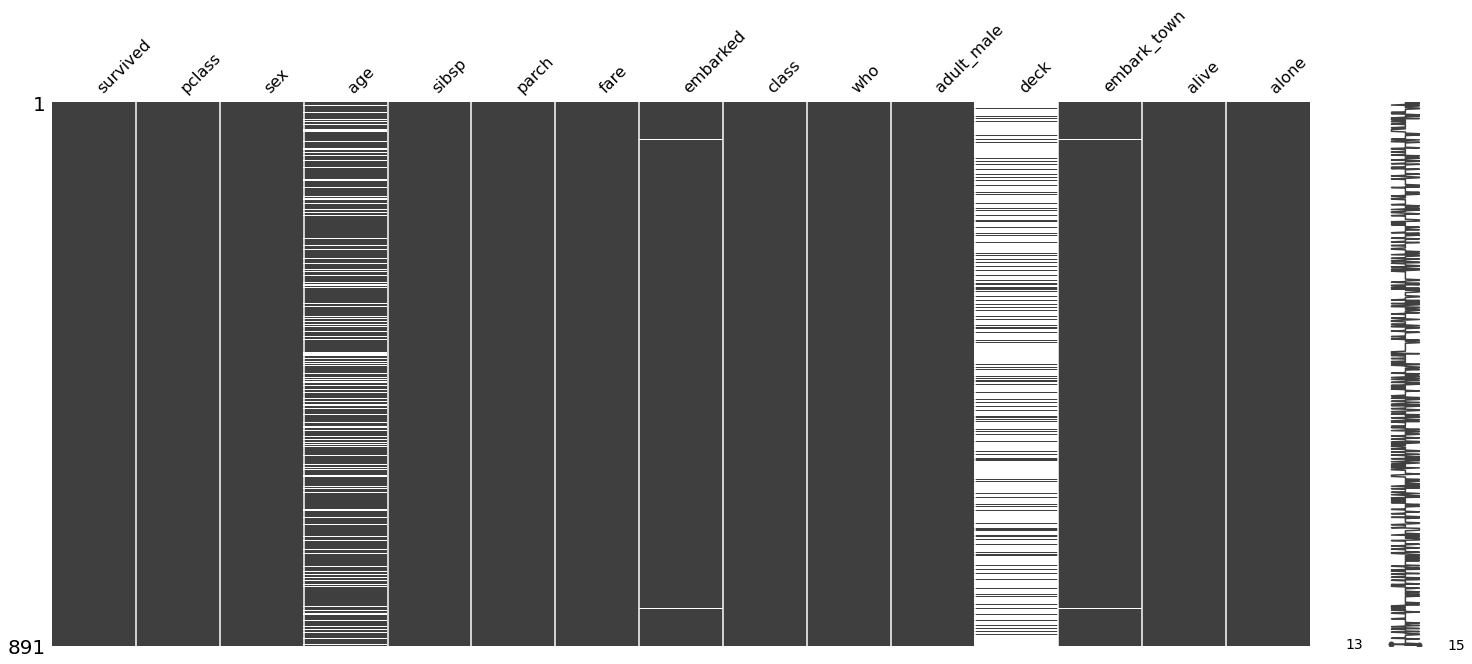

In [132]:
msno.matrix(titanic)

<AxesSubplot:>

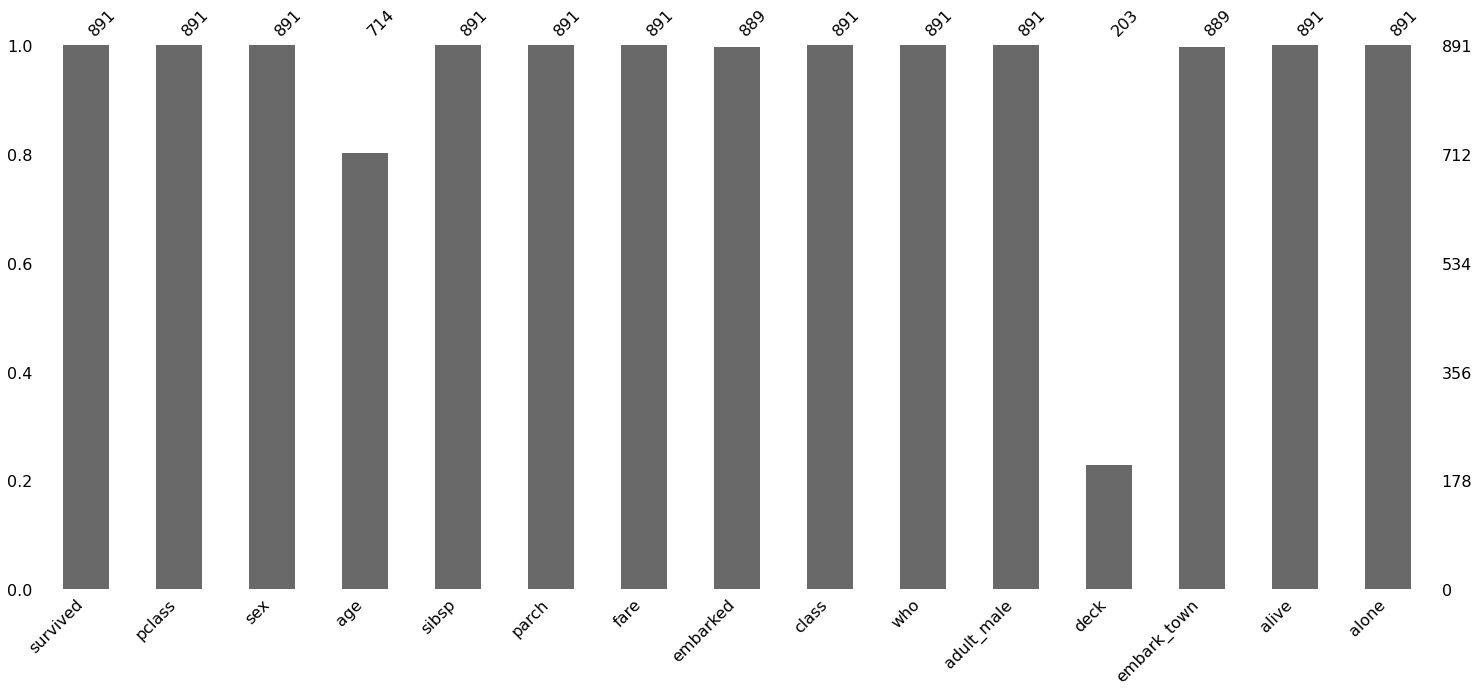

In [133]:
msno.bar(titanic)

In [139]:
print('결측값을 드랍하지 않고 대체값(평균, 중앙, 최빈)으로 변경한다면 ---')
print('fit_transform --')
print()

imputer = SimpleImputer(strategy='most_frequent')

clean_frm = pd.DataFrame(imputer.fit_transform(tmp_frm), columns=tmp_frm.columns)

clean_frm

결측값을 드랍하지 않고 대체값(평균, 중앙, 최빈)으로 변경한다면 ---
fit_transform --



,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,0.1,1.0,2019-01-02,B
2,3.0,0.1,3.0,2019-01-03,C
3,1.0,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,1.0,0.1,1.0,2019-01-06,C
6,7.0,0.7,7.0,2019-01-01,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,1.0,2019-01-09,C


In [145]:
print('titanic - age, deck - mean 대체한다면')

imputer = SimpleImputer(strategy='mean')
titanic['age'] = imputer.fit_transform( titanic[['age']])
titanic

titanic - age, deck - mean 대체한다면


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


titanic deck의 결측값을 "D" 대체한다면 ---


<AxesSubplot:>

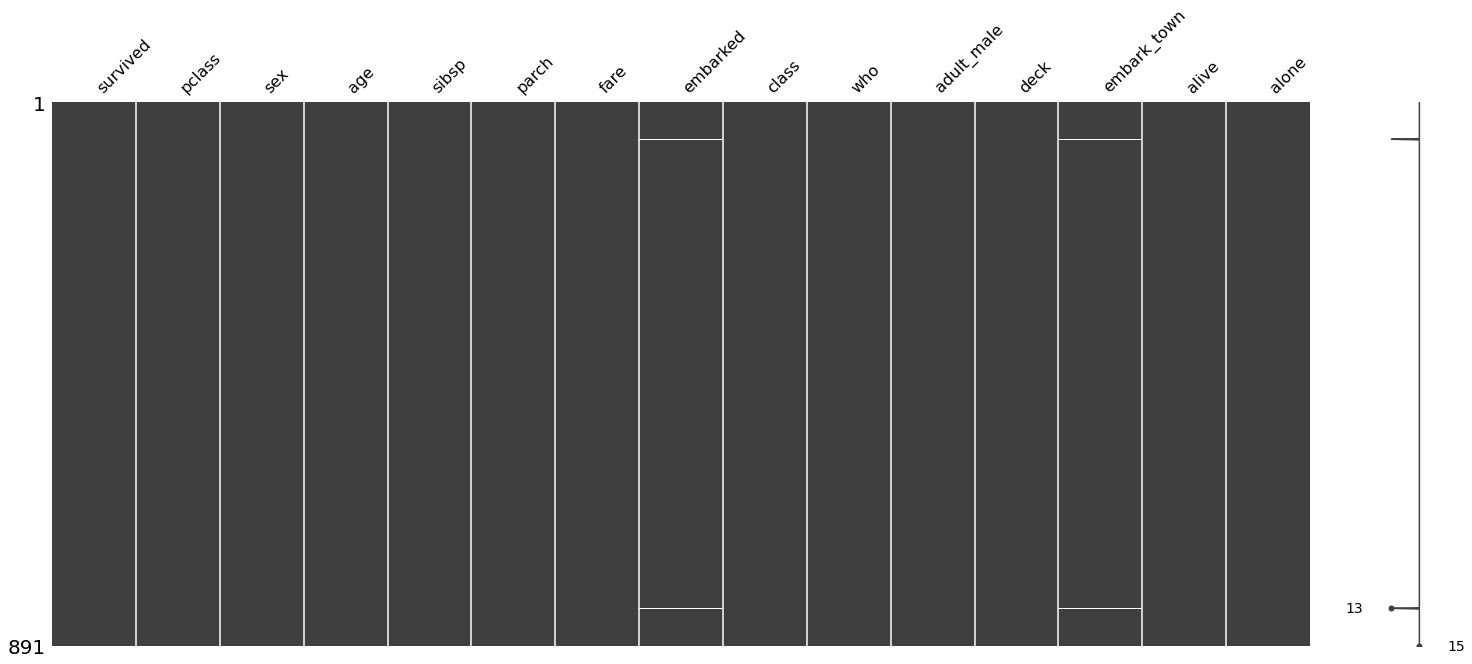

In [149]:
print('titanic deck의 결측값을 "D" 대체한다면 ---')
titanic['deck'] = titanic['deck'].fillna('D')
msno.matrix(titanic)

In [152]:
### feature scaling
iris_frm = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [153]:
iris_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [154]:
iris_frm.describe() # 통계정보

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [156]:
print('표준화 -- StanardScaler')

s_scaler = StandardScaler()
s_iris_frm =  s_scaler.fit_transform(iris_frm)
s_iris_frm = pd.DataFrame(data = s_iris_frm, columns=iris.feature_names)
s_iris_frm

표준화 -- StanardScaler


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [157]:
print('정규화 -- MinMaxScaler')

m_scaler = MinMaxScaler()
m_iris_frm =  m_scaler.fit_transform(iris_frm)
m_iris_frm = pd.DataFrame(data = m_iris_frm, columns=iris.feature_names)
m_iris_frm

정규화 -- MinMaxScaler


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [165]:
### 스케일링시 주의할 점!!! (중요)
print('예제를 통한 문제점 파악!!!')
print()
print()

X_train = np.arange(0,11).reshape(-1,1)
print('data --- \n' , X_train)
print('train shape ---', X_train.shape)
print()

X_test = np.arange(0,6).reshape(-1,1)
print('data --- \n' , X_test)
print('train shape ---', X_test.shape)


예제를 통한 문제점 파악!!!


data --- 
 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
train shape --- (11, 1)

data --- 
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
train shape --- (6, 1)


In [178]:
print('학습데이터의 정규화')
train_scaler = MinMaxScaler()
m_train_scaler = train_scaler.fit_transform(X_train)
print()
print('원본 데이터 ---', X_train.reshape(-1))
print('정구화 데이터 ---', m_train_scaler.reshape(-1))

print()
print()

print('테스트 데이터의 정규화')
test_scaler = MinMaxScaler()
m_test_scaler = test_scaler.fit_transform(X_test)
print()
print('원본 데이터 ---', X_test.reshape(-1))
print('정구화 데이터 ---', m_test_scaler.reshape(-1))

학습데이터의 정규화

원본 데이터 --- [ 0  1  2  3  4  5  6  7  8  9 10]
정구화 데이터 --- [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


테스트 데이터의 정규화

원본 데이터 --- [0 1 2 3 4 5]
정구화 데이터 --- [0.  0.2 0.4 0.6 0.8 1. ]


In [175]:
print('스케일링의 문제점을 해결하기 위해서는 학습데이터를 기준으로 테스트 데이터를 스케일링 해야한다!! ---')

스케일링의 문제점을 해결하기 위해서는 학습데이터를 기준으로 테스트 데이터를 스케일링 해야한다!! ---


In [177]:
print('학습데이터의 정규화')
scaler = MinMaxScaler()
scaler.fit(X_train)
m_train_scaler = scaler.transform(X_train)
print()
print('원본 데이터 ---', X_train.reshape(-1))
print('정구화 데이터 ---', m_train_scaler.reshape(-1))

print()
print()

print('테스트 데이터의 정규화')
m_test_scaler = scaler.transform(X_test)
print()
print('원본 데이터 ---', X_test.reshape(-1))
print('정구화 데이터 ---', m_test_scaler.reshape(-1))

학습데이터의 정규화

원본 데이터 --- [ 0  1  2  3  4  5  6  7  8  9 10]
정구화 데이터 --- [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


테스트 데이터의 정규화

원본 데이터 --- [0 1 2 3 4 5]
정구화 데이터 --- [0.  0.1 0.2 0.3 0.4 0.5]


In [216]:
sample_frm = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv' , 
                                   header  = None , 
                                   usecols = [0, 2, 13])


m_scaler = MinMaxScaler()
m_sample_frm =  m_scaler.fit_transform(sample_frm)
m_sample_frm = pd.DataFrame(data = m_sample_frm, columns=['target','x','y'])
print(m_sample_frm)
print()
print()
print()
m_scaler = StandardScaler()
m_sample_frm =  s_scaler.fit_transform(sample_frm)
m_sample_frm = pd.DataFrame(data = m_sample_frm, columns=['target','x','y'])
m_sample_frm
print(m_sample_frm)

# 스케일링 전 모델 학습





# 스케일링 후 모델 학습 - 정규화, 표준화


     target         x         y
0       0.0  0.191700  0.561341
1       0.0  0.205534  0.550642
2       0.0  0.320158  0.646933
3       0.0  0.239130  0.857347
4       0.0  0.365613  0.325963
..      ...       ...       ...
173     1.0  0.970356  0.329529
174     1.0  0.626482  0.336662
175     1.0  0.699605  0.397290
176     1.0  0.365613  0.400856
177     1.0  0.664032  0.201141

[178 rows x 3 columns]


TypeError: print() argument after * must be an iterable, not int

In [245]:
tips = sns.load_dataset('tips')
print('type - ' , type(tips))

type -  <class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

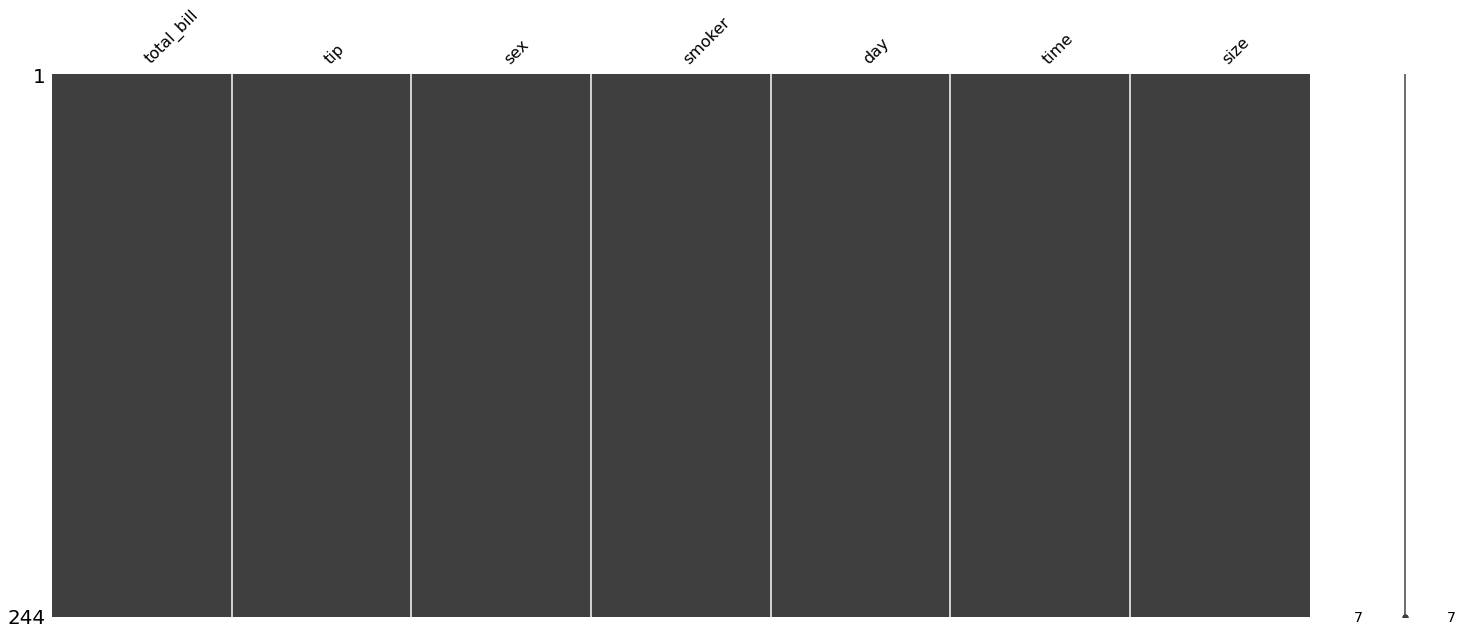

In [246]:
import matplotlib.pyplot as plt
%matplotlib inline
msno.matrix(tips)

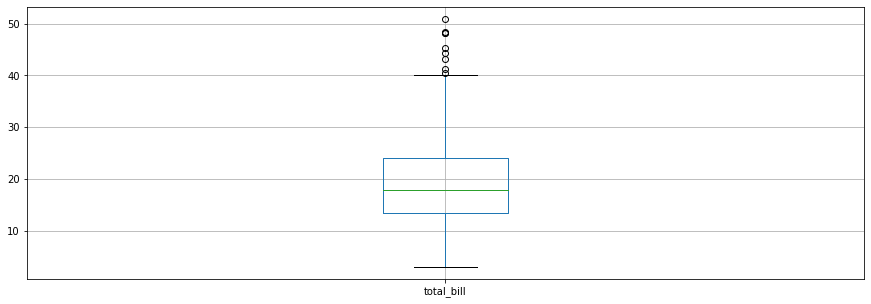

In [247]:
plt.figure(figsize=(15,5))

tips.boxplot(column = ['total_bill'])

plt.show()
plt.close()

/Users/isang-won/opt/anaconda3/envs/pydatavenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


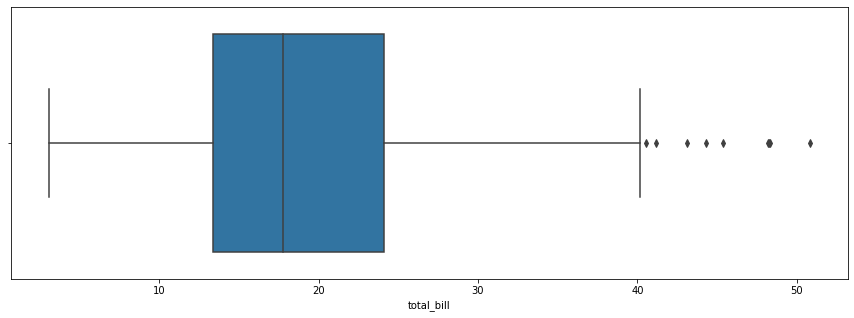

In [248]:
plt.figure(figsize=(15,5))

sns.boxplot(tips['total_bill'])

plt.show()
plt.close()

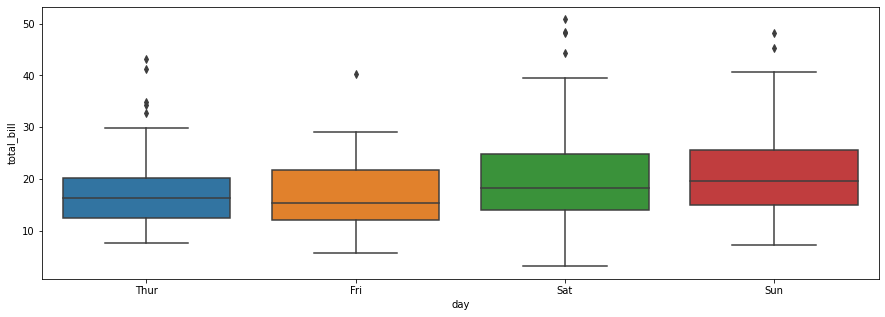

In [249]:
plt.figure(figsize=(15,5))

sns.boxplot(x = 'day',
            y = 'total_bill',
            data = tips)

plt.show()
plt.close()

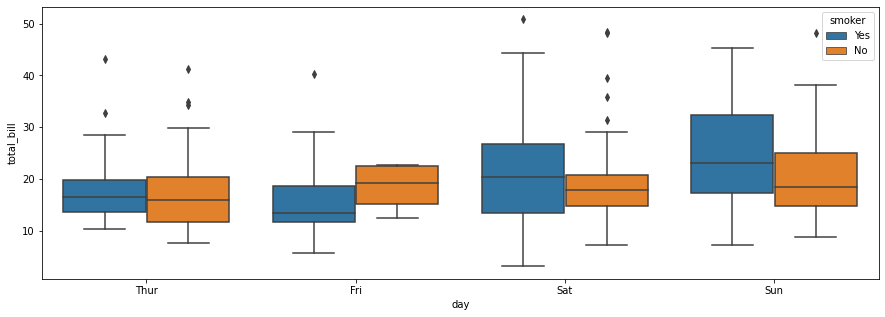

In [250]:
plt.figure(figsize=(15,5))

sns.boxplot(x = 'day',
            y = 'total_bill',
            hue = 'smoker',
            data = tips)

plt.show()
plt.close()

In [228]:
print('이상치 값 제거')
print('이상치 값 변환 - Nan 대체값으로 처리')

이상치 값 제거
이상치 값 변환 - Nan 대체값으로 처리


In [252]:
q1 = tips['tip'].quantile(0.25)
q3 = tips['tip'].quantile(0.75)

# IQR
iqr = 1.5 * (q3-q1)

In [253]:
def removeQutlier(frm, column) :
    q1 = frm[column].quantile(0.25)
    q3 = frm[column].quantile(0.75)
    
    tmp_frm = frm
    # IQR
    iqr = 1.5 * (q3-q1)
    tmp_frm[column][ (tmp_frm[column] > (q3 + iqr)) | (tmp_frm[column] < (q1 - iqr))] = None 
    
    return tmp_frm

/var/folders/8x/my7blpjs0bg1hmjhzgvz02th0000gn/T/ipykernel_1435/3908779777.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_frm[column][ (tmp_frm[column] > (q3 + iqr)) | (tmp_frm[column] < (q1 - iqr))] = None


<AxesSubplot:>

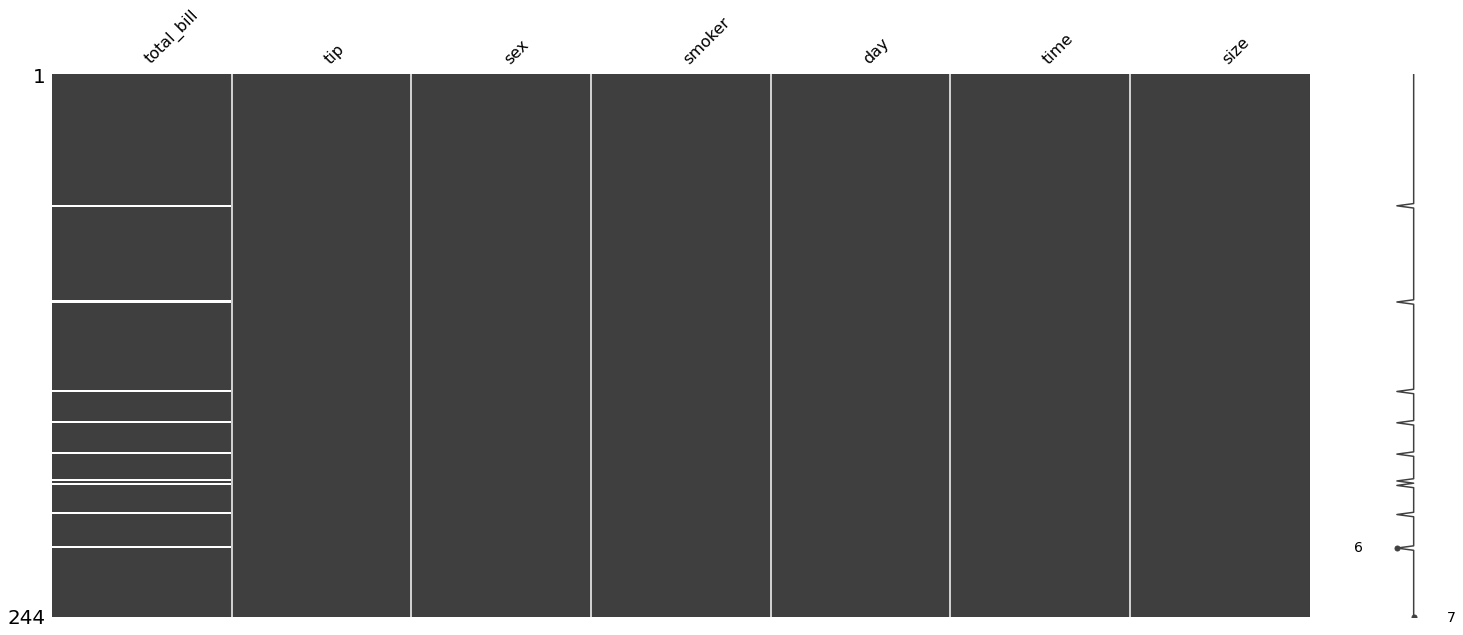

In [254]:
outlier_frm = removeQutlier(tips, 'total_bill')
msno.matrix(outlier_frm)

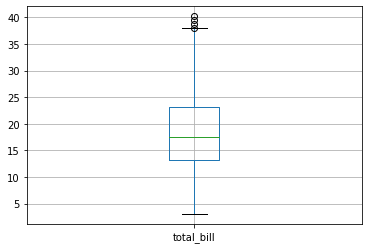

In [255]:
outlier_frm.boxplot(column='total_bill')
plt.show()
plt.close()